In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [5]:
df[df.InvoiceNo.str.contains('C', na=False)].head(10)

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE       -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES       -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES       -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES       -24   
239   C536391     21484       CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY       -12   
241   C536391     22553            PLASTERS IN TIN SKULLS       -24   
939   C536506     22960          JAM MAKING SET WITH JARS        -6   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
239 2010-12-01 10:24:00       3.45     17548.0  United Kingdom  
240 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
241 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
939 2010-12-01 12:38:00       4.25     17897.0  United Kingdom

In [6]:
df = df[~df['InvoiceNo'].str.contains('C')]

<AxesSubplot:>

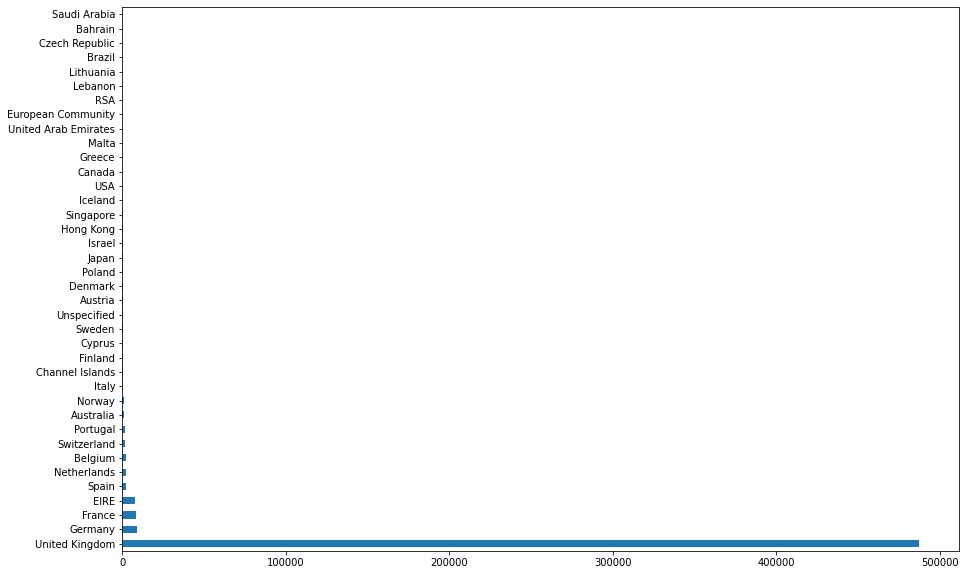

In [7]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [8]:
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [9]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                         0.0                      0.0   
536366                         0.0                      0.0   
536367                         0.0                      0.0   
536368                         0.0                      0.0   
536369                         0.0                      0.0   
536371                         0.0                      0.0   
536372                         0.0                      0.0   
536373                         0.0                      0.0   
536374                         0.0                      0.0   
536375                         0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   
536371                          0.0                         0.0   
536372                          0.0                         0.0   
536373                          0.0                         0.0   
536374                          0.0                         0.0   
536375                          0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   
536371                             0.0                        0.0   
536372                             0.0                        0.0   
536373                             0.0                        0.0   
536374                             0.0                        0.0   
536375                             0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   
536371                                0.0                               0.0   
536372                                0.0                               0.0   
536373                                0.0                               0.0   
536374                                0.0                               0.0   
536375                                0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                            0.0   
536368                                   0.0                            0.0   
536369                                   0.0                            0.0   
536371                                   0.0                            0.0   
536372                      

In [10]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1
basket = basket.applymap(encode_data)
basket.drop('POSTAGE', inplace=True, axis=1)
itemsets = apriori(basket, min_support=0.03, use_colnames=True)
itemsets.head(10)

support                           itemsets
0  0.045803           (6 RIBBONS RUSTIC CHARM)
1  0.031124  (60 CAKE CASES VINTAGE CHRISTMAS)
2  0.040339      (60 TEATIME FAIRY CAKE CASES)
3  0.046928       (ALARM CLOCK BAKELIKE GREEN)
4  0.035142        (ALARM CLOCK BAKELIKE PINK)
5  0.049821         (ALARM CLOCK BAKELIKE RED)
6  0.036214     (ANTIQUE SILVER T-LIGHT GLASS)
7  0.073445    (ASSORTED COLOUR BIRD ORNAMENT)
8  0.042267     (BAKING SET 9 PIECE RETROSPOT)
9  0.035089              (BATHROOM METAL SIGN)

In [11]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [12]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ' , ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016  ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.030160175711148016  ,  0.6426940639269406 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027  ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027  ,  0.6177730192719486 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641  ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641  ,  0.7324973876698014 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT [ 0.03053516901483902  ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT [ 0.042052820485348474  ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT [ 0.03519580007499866  ,  0.5798764342453663 ]

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

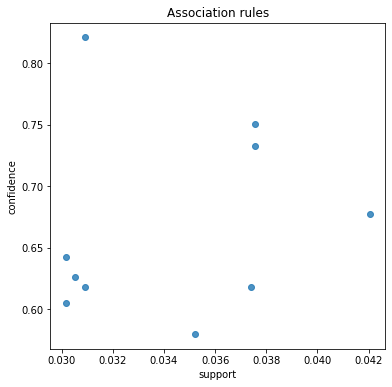

In [13]:
support = rules['support'].values
confidence = rules['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support, y = confidence, fit_reg=False)

In [14]:
import mlxtend
print(mlxtend.__version__)

0.17.3


In [15]:
itemsets2 = fpgrowth(basket, min_support=0.03, use_colnames=True)
itemsets2.head(10)

support                              itemsets
0  0.116034  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.073445       (ASSORTED COLOUR BIRD ORNAMENT)
2  0.040071            (HOME BUILDING BLOCK WORD)
3  0.032517            (LOVE BUILDING BLOCK WORD)
4  0.030107                 (DOORMAT NEW ENGLAND)
5  0.053517            (JAM MAKING SET WITH JARS)
6  0.060267      (PAPER CHAIN KIT 50'S CHRISTMAS)
7  0.057642   (WOODEN PICTURE FRAME WHITE FINISH)
8  0.050463          (WOODEN FRAME ANTIQUE WHITE)
9  0.037714    (RED HANGING HEART T-LIGHT HOLDER)

In [16]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [17]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ' , ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016  ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.030160175711148016  ,  0.6426940639269406 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027  ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027  ,  0.6177730192719486 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641  ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641  ,  0.7324973876698014 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT [ 0.03053516901483902  ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT [ 0.042052820485348474  ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT [ 0.03519580007499866  ,  0.5798764342453663 ]

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

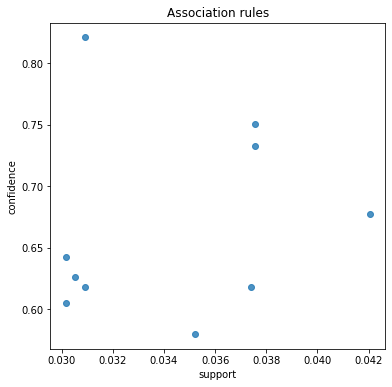

In [18]:
support = rules['support'].values
confidence = rules['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support, y = confidence, fit_reg=False)

In [19]:
#nuoc Duc

In [20]:
basket_G = df[df['Country'] == "Germany"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [21]:
basket_G = basket_G.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_G.head(10)

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   
537197                          0.0                         0.0   
537198                          0.0                         0.0   
537201                          0.0                         0.0   
537212                          0.0                         0.0   
537250                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   
537197                                    0.0   
537198                                    0.0   
537201                                    0.0   
537212                                    0.0   
537250                                    0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536527                                   0.0                            0.0   
536840                                   0.0                            0.0   
536861                                   0.0                            0.0   
536967                                   0.0                            0.0   
536983                                   0.0                            0.0   
537197                                   0.0                            0.0   
537198                                   0.0                            0.0   
537201                                   0.0                            0.0   
537212                                   0.0                            0.0   
537250                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536527                                       0.0                          0.0   
536840                                       0.0                          0.0   
536861                                       0.0                          0.0   
536967                                       0.0                          0.0   
536983                                       0.0                          0.0   
537197                                       0.0                          0.0   
537198                                       0.0                          0.0   
537201                                       0.0                          0.0   
537212                                       0.0                          0.0   
537250                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536527                             0.0                                 0.0   
536840                             0.0                                 0.0   
536861                             0.0                                 0.0   
536967                             0.0                                 0.0   
536983                             0.0                                 0.0   
537197                             0.0                                 0.0   
537198                             0.0                      

In [22]:
basket_G = basket_G.applymap(encode_data)
basket_G.drop('POSTAGE', inplace=True, axis=1)
itemsets_G = apriori(basket_G, min_support=0.05, use_colnames=True)
itemsets_G.head(10)

support                        itemsets
0  0.102845        (6 RIBBONS RUSTIC CHARM)
1  0.070022     (ALARM CLOCK BAKELIKE PINK)
2  0.065646   (CHARLOTTE BAG APPLES DESIGN)
3  0.050328  (CHILDRENS CUTLERY DOLLY GIRL)
4  0.061269      (COFFEE MUG APPLES DESIGN)
5  0.063457    (FAWN BLUE HOT WATER BOTTLE)
6  0.072210             (GUMBALL COAT RACK)
7  0.056893          (IVORY KITCHEN SCALES)
8  0.063457         (JAM JAR WITH PINK LID)
9  0.091904        (JAM MAKING SET PRINTED)

In [29]:
rules_G = association_rules(itemsets_G, metric="confidence", min_threshold=0.5)
rules_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [26]:
rules_G["antecedents"] = rules_G["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_G["consequents"] = rules_G["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules_G)):
    print(rules_G.loc[i, 'antecedents'], ' ==> ', rules_G.loc[i, 'consequents'],
         '[', rules_G.loc[i, 'support'], ' , ', rules_G.loc[i, 'confidence'], ']')

P  ==>  P [ 0.06783369803063458  ,  0.5849056603773585 ]
P  ==>  P [ 0.061269146608315096  ,  0.5714285714285714 ]
P  ==>  R [ 0.07439824945295405  ,  0.5396825396825397 ]
R  ==>  W [ 0.05908096280087528  ,  0.8437500000000001 ]
R  ==>  R [ 0.13129102844638948  ,  0.5357142857142857 ]
R  ==>  R [ 0.13129102844638948  ,  0.8333333333333333 ]
S  ==>  R [ 0.0700218818380744  ,  0.6808510638297872 ]
W  ==>  R [ 0.06345733041575492  ,  0.5 ]


<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

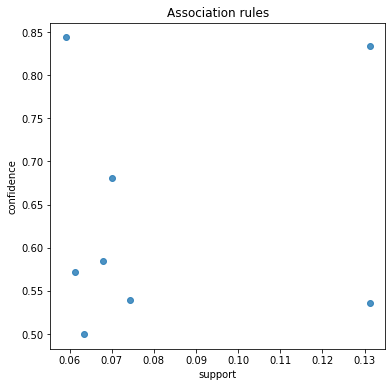

In [52]:
support_G = rules_G['support'].values
confidence_G = rules_G['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support_G, y = confidence_G, fit_reg=False)

In [40]:
itemset_G2 = fpgrowth(basket_G, min_support=0.05, use_colnames=True)
itemset_G2.head(10)

support                              itemsets
0  0.100656          (JUMBO BAG WOODLAND ANIMALS)
1  0.102845              (6 RIBBONS RUSTIC CHARM)
2  0.091904              (JAM MAKING SET PRINTED)
3  0.085339     (PACK OF 72 RETROSPOT CAKE CASES)
4  0.063457               (JAM JAR WITH PINK LID)
5  0.078775             (JUMBO BAG RED RETROSPOT)
6  0.067834    (WOODLAND PARTY BAG + STICKER SET)
7  0.056893                (IVORY KITCHEN SCALES)
8  0.054705           (MEMO BOARD COTTAGE DESIGN)
9  0.245077  (ROUND SNACK BOXES SET OF4 WOODLAND)

In [41]:
rules_G2 = association_rules(itemset_G2, metric="confidence", min_threshold=0.5)
rules_G2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
dtypes: float64(7), object(2)
memory usage: 704.0+ bytes


In [42]:
rules_G2["antecedents"] = rules_G2["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_G2["consequents"] = rules_G2["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules_G2)):
    print(rules_G2.loc[i, 'antecedents'], ' ==> ', rules_G2.loc[i, 'consequents'],
         '[', rules_G2.loc[i, 'support'], ' , ', rules_G2.loc[i, 'confidence'], ']')

ROUND SNACK BOXES SET OF4 WOODLAND  ==>  ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948  ,  0.5357142857142857 ]
ROUND SNACK BOXES SET OF 4 FRUITS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948  ,  0.8333333333333333 ]
WOODLAND CHARLOTTE BAG  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492  ,  0.5 ]
PLASTERS IN TIN CIRCUS PARADE  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458  ,  0.5849056603773585 ]
SPACEBOY LUNCH BOX  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744  ,  0.6808510638297872 ]
RED RETROSPOT CHARLOTTE BAG  ==>  WOODLAND CHARLOTTE BAG [ 0.05908096280087528  ,  0.8437500000000001 ]
PLASTERS IN TIN WOODLAND ANIMALS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405  ,  0.5396825396825397 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096  ,  0.5714285714285714 ]


<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

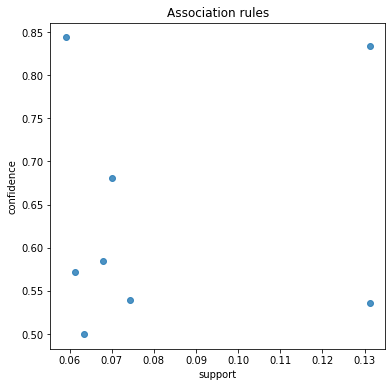

In [53]:
support_G2 = rules_G2['support'].values
confidence_G2 = rules_G2['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support_G, y = confidence_G, fit_reg=False)

In [36]:
#nuoc Phap

In [46]:
basket_F = df[df['Country'] == "France"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [47]:
basket_F = basket_F.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_F.head(10)

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   
537468                         24.0                         0.0   
537693                          0.0                         0.0   
537897                          0.0                         0.0   
537967                          0.0                         0.0   
538008                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   
537468                             0.0                              0.0   
537693                             0.0                              0.0   
537897                             0.0                              0.0   
537967                             0.0                              0.0   
538008                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   
537468                                 0.0   
537693                                 0.0   
537897                                 0.0   
537967                                 0.0   
538008                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   
537468                                       0.0                          0.0   
537693                                       0.0                          0.0   
537897                                       0.0                          0.0   
537967                                       0.0                          0.0   
538008                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                             0.0                                 0.0   
537468                             0.0                                 0.0   
537693                             0.0                                 0.0   
537897                             0.0                            

In [48]:
basket_F = basket_F.applymap(encode_data)
basket_F.drop('POSTAGE', inplace=True, axis=1)
itemsets_F = apriori(basket_F, min_support=0.07, use_colnames=True)
itemsets_F.head(10)

support                        itemsets
0  0.071429   (4 TRADITIONAL SPINNING TOPS)
1  0.096939    (ALARM CLOCK BAKELIKE GREEN)
2  0.102041     (ALARM CLOCK BAKELIKE PINK)
3  0.094388      (ALARM CLOCK BAKELIKE RED)
4  0.081633  (BAKING SET 9 PIECE RETROSPOT)
5  0.071429  (CHILDRENS CUTLERY DOLLY GIRL)
6  0.099490          (DOLLY GIRL LUNCH BOX)
7  0.096939       (JUMBO BAG RED RETROSPOT)
8  0.076531    (JUMBO BAG WOODLAND ANIMALS)
9  0.125000        (LUNCH BAG APPLE DESIGN)

In [49]:
rules_F = association_rules(itemsets_F, metric="confidence", min_threshold=0.7)
rules_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         20 non-null     object 
 1   consequents         20 non-null     object 
 2   antecedent support  20 non-null     float64
 3   consequent support  20 non-null     float64
 4   support             20 non-null     float64
 5   confidence          20 non-null     float64
 6   lift                20 non-null     float64
 7   leverage            20 non-null     float64
 8   conviction          20 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


In [50]:
rules_F["antecedents"] = rules_F["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_F["consequents"] = rules_F["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules_F)):
    print(rules_F.loc[i, 'antecedents'], ' ==> ', rules_F.loc[i, 'consequents'],
         '[', rules_F.loc[i, 'support'], ' , ', rules_F.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469  ,  0.725 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469  ,  0.7631578947368421 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123  ,  0.8378378378378379 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.07908163265306123  ,  0.8157894736842106 ]
ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE RED [ 0.07397959183673469  ,  0.725 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469  ,  0.7837837837837838 ]
DOLLY GIRL LUNCH BOX  ==>  SPACEBOY LUNCH BOX [ 0.07142857142857142  ,  0.717948717948718 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388  ,  0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS  ==>  SET/20 RED RETROSPOT PAPER NAPKINS [ 0.10204081632653061  ,  0.7407407407407408 ]
SET/20 RED RETROSPOT PAPER NAPKINS  ==>  SET/6 RED SPOTTY PAPER CUPS [ 0.1020

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

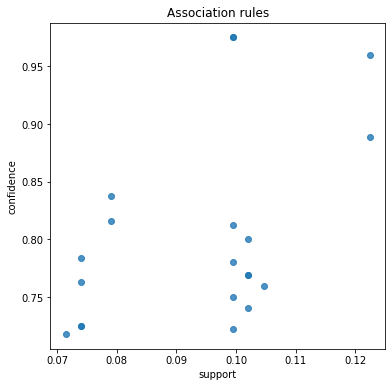

In [54]:
support_F = rules_F['support'].values
confidence_F = rules_F['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support_F, y = confidence_F, fit_reg=False)

In [56]:
itemset_F2 = fpgrowth(basket_F, min_support=0.07, use_colnames=True)
itemset_F2.head(10)

support                              itemsets
0  0.181122       (RED TOADSTOOL LED NIGHT LIGHT)
1  0.158163  (ROUND SNACK BOXES SET OF4 WOODLAND)
2  0.125000                  (SPACEBOY LUNCH BOX)
3  0.104592              (MINI PAINT SET VINTAGE)
4  0.102041           (ALARM CLOCK BAKELIKE PINK)
5  0.096939          (ALARM CLOCK BAKELIKE GREEN)
6  0.094388            (ALARM CLOCK BAKELIKE RED)
7  0.153061             (LUNCH BAG RED RETROSPOT)
8  0.142857    (LUNCH BOX WITH CUTLERY RETROSPOT)
9  0.137755            (RED RETROSPOT MINI CASES)

In [57]:
rules_F2 = association_rules(itemset_F2, metric="confidence", min_threshold=0.7)
rules_F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         20 non-null     object 
 1   consequents         20 non-null     object 
 2   antecedent support  20 non-null     float64
 3   consequent support  20 non-null     float64
 4   support             20 non-null     float64
 5   confidence          20 non-null     float64
 6   lift                20 non-null     float64
 7   leverage            20 non-null     float64
 8   conviction          20 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


In [58]:
rules_F2["antecedents"] = rules_F2["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules_F2["consequents"] = rules_F2["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules_F2)):
    print(rules_F2.loc[i, 'antecedents'], ' ==> ', rules_F2.loc[i, 'consequents'],
         '[', rules_F2.loc[i, 'support'], ' , ', rules_F2.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469  ,  0.725 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469  ,  0.7631578947368421 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123  ,  0.8378378378378379 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.07908163265306123  ,  0.8157894736842106 ]
ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE RED [ 0.07397959183673469  ,  0.725 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469  ,  0.7837837837837838 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388  ,  0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS  ==>  SET/6 RED SPOTTY PAPER PLATES [ 0.12244897959183673  ,  0.888888888888889 ]
SET/6 RED SPOTTY PAPER PLATES  ==>  SET/6 RED SPOTTY PAPER CUPS [ 0.12244897959183673  ,  0.96 ]
SET/6 RED SPOTTY PAPER PLATES  ==>  SET/20 RED RETROSPOT PAPER NAPKINS [ 0.102

<AxesSubplot:title={'center':'Association rules'}, xlabel='support', ylabel='confidence'>

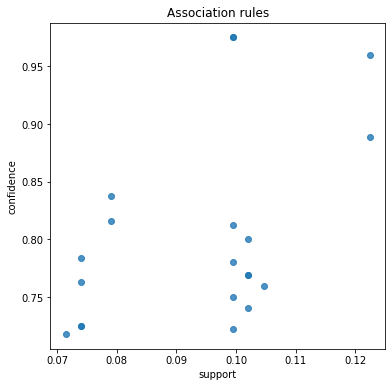

In [59]:
support_F2 = rules_F2['support'].values
confidence_F2 = rules_F2['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x= support_F2, y = confidence_F2, fit_reg=False)